In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [ ]:
print("Show the 1st 5 rows of the dataset")
print(df.head())

Show the 1st 5 rows of the dataset
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income 

In [ ]:
df = df.dropna()
print("\nData after cleaning:", df.shape)


Data after cleaning: (6378, 20)


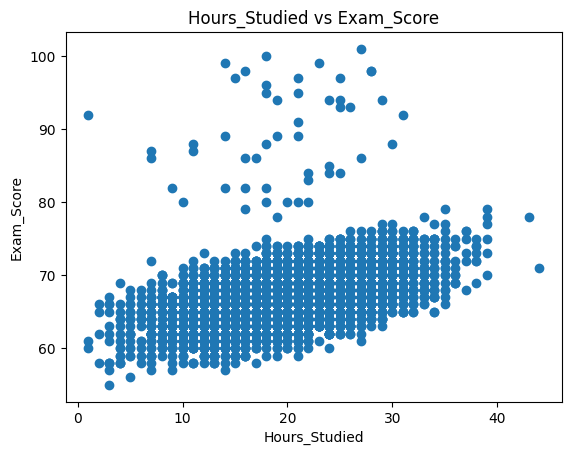

In [ ]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.show()

In [ ]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 12.351733799445535
R-squared: 0.2051306083246669


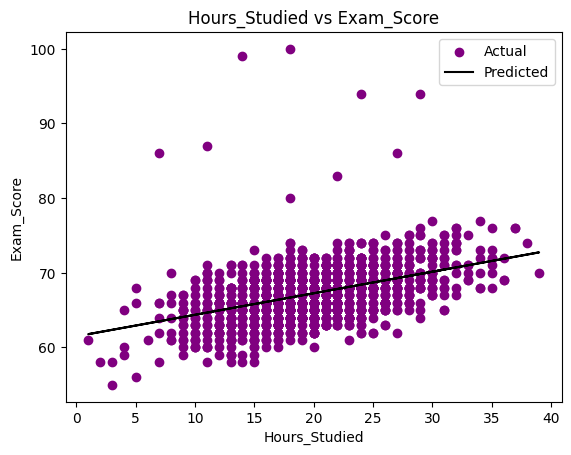

In [ ]:
plt.scatter(X_test, y_test, color='purple', label='Actual')
plt.plot(X_test, y_pred, color='black', label='Predicted')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [ ]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

LinearRegression()

In [ ]:
y_poly_pred = poly_model.predict(X_test_poly)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


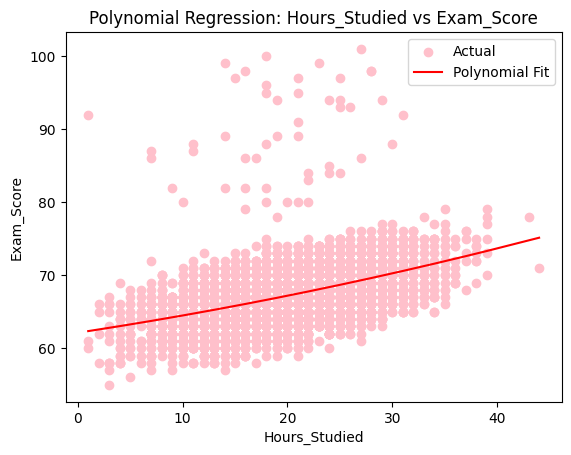

In [ ]:
# ---- Polynomial Regression Plot ----
import numpy as np

# Sort values for smooth curve plotting
X_sorted = np.sort(X['Hours_Studied'].values).reshape(-1, 1)
X_sorted_poly = poly.transform(X_sorted)
y_sorted_pred = poly_model.predict(X_sorted_poly)

# Actual data points
plt.scatter(X['Hours_Studied'], y, color='pink', label='Actual')

# Predicted curve
plt.plot(X_sorted, y_sorted_pred, color='red', label='Polynomial Fit')

plt.xlabel("Hours_Studied")
plt.ylabel("Exam_Score")
plt.title("Polynomial Regression: Hours_Studied vs Exam_Score")
plt.legend()
plt.show()

In [ ]:
print("Polynomial Regression MSE:", mean_squared_error(y_test_poly, y_poly_pred))
print("Polynomial Regression R-squared:", r2_score(y_test_poly, y_poly_pred))

Polynomial Regression MSE: 12.352544212816404
Polynomial Regression R-squared: 0.2050784559067499
